# Projeto 3 - Treinamento de modelo de classificação de asteroides potencialmente perigosos (PHA)

Este projeto consiste em utilizar dados de asteroides coletados da NASA via Small-Body DataBase API para treinar um modelo de classificação capaz de identificar asteroides potencialmente perigosos.

Para realizar esta tarefa, vamos utilizar o modelo de classificação SVC (Support Vector Classification), já que o mesmo possui boa adequação a espaços de alta dimensão (features numerosas).

In [2]:
# Instalando a biblioteca astroquery
!pip install astroquery

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 888.9/888.9 kB 22.0 MB/s eta 0:00:00


In [3]:
# importando bibliotecas
from astroquery.jplsbdb import SBDB
from tqdm import tqdm
import pandas as pd
import json

# Coletando dados de asteroides NEO

Nossos dados consistirão em:



*   des: designação primária
*   pha: objeto potencialmente perigoso
*   neo: objeto próximo da Terra
*   e: excentricidade
*   a: semi-eixo maior (au)
*   q: distância do periélio (au)
*   i: inclinação (deg)
*   om: longitude do nó ascendente (deg)
*   w: argumento do periélio (deg)
*   ma: anomalia média (deg)
*   tp: tempo de passagem do periélio (TDB) formatado como dia juliano
*   per: período orbital (d)
*   n: movimento médio (deg/d)
*   ad: distância do afélio (au)
*   moid: distância mínima de intersecção orbital em relação à Terra (au)
*   moid_jp: distância mínima de intersecção orbital em relação a Júpiter (au)
*   t_jup: Júpiter Tisserand invariante
*   rms: valor quadrático médio do ajuste da órbita
*   H: magnitude absoluta


In [4]:
# Funções auxiliares

# Converte json para dicionário
def json_to_dict(asteroid_object, asteroid_orbit, asteroid_phys):

  asteroid_dict = {'des': asteroid_object['des'],
                  'pha': asteroid_object['pha'],
                  'neo': asteroid_object['neo'],
                  'e': asteroid_orbit['elements']['e'],
                  'a': asteroid_orbit['elements']['a'].value,
                  'q': asteroid_orbit['elements']['q'].value,
                  'i': asteroid_orbit['elements']['i'].value,
                  'om': asteroid_orbit['elements']['om'].value,
                  'w': asteroid_orbit['elements']['w'].value,
                  'ma': asteroid_orbit['elements']['ma'].value,
                  'tp': asteroid_orbit['elements']['tp'].value,
                  'per': asteroid_orbit['elements']['per'].value,
                  'n': asteroid_orbit['elements']['n'].value,
                  'ad': asteroid_orbit['elements']['ad'].value,
                  'moid': asteroid_orbit['moid'].value,
                  'moid_jup': asteroid_orbit['moid_jup'].value,
                  't_jup': asteroid_orbit['t_jup'],
                  'rms': asteroid_orbit['rms'],
                  'H': asteroid_phys['H']}

  return asteroid_dict

# Retorna uma lista de letras entre start e end
def get_letter(start, end):

  letter_list = [chr(i) for i in range(ord(start), ord(end) + 1)]
  letter_list.remove('I')
  return letter_list

# Converte float para int
def convert_float_to_int(vector):
  for i in range(len(vector)):
    if type(vector[i]) == float:
      vector[i] = int(vector[i])

  return vector

In [5]:
# Faz requisições e gera uma lista com os nomes dos asteróides dos anos solicidados
def request_asteroids_des(year_list):

  first_letter = get_letter('A', 'Y')
  second_letter = get_letter('A', 'Z')
  asteroids_list = []

  for year in year_list:
    print(year)
    for first in first_letter:
      for second in second_letter:
        try:
          query = f'{year} {first}{second}*'
          sbdb = SBDB.query(query, neo_only=True)

          if 'list' in sbdb:
            asteroids_list.extend(sbdb['list']['pdes'])
          else:
            asteroids_list.extend([sbdb['object']['des']])

        except Exception:
          continue

  return asteroids_list

# Recebe a lista de nomes dos asteroides, faz a requisição para obter dados para cada asteroide e retorna um dataframe com estes dados
def resquest_asteroids_data(asteroids_des):

  asteroids_list = []

  for asteroid in tqdm(asteroids_des, desc='Processando requisições'):
    try:

      sbdb = SBDB.query(f'{asteroid}', phys=True)

      asteroid_object = sbdb['object']
      asteroid_orbit = sbdb['orbit']
      asteroid_phys = sbdb['phys_par']

      asteroid_dict = json_to_dict(asteroid_object, asteroid_orbit, asteroid_phys)
      asteroids_list.append(asteroid_dict)

    except Exception:
      continue

  asteroids = pd.DataFrame(asteroids_list)

  return asteroids

In [ ]:
# Execute apenas se não possuir dados salvo em arquivo e deseja obte-los através da API SBDB (descomente o código)
# Executando as requisições e gerando uma lista com as designações dos asteroides

#years = list(range(2000, 2024))
#asteroids_des = request_asteroids_des(years)

In [49]:
# Execute apenas se não possuir dados salvo em arquivo e deseja obte-los através da API SBDB (descomente o código)
# Convertendo para int des que vieram como float

#asteroids_des = convert_float_to_int(asteroids_des)
#len(asteroids_des)

33277

In [53]:
# Execute apenas se não possuir dados salvo em arquivo e deseja obte-los através da API SBDB (descomente o código)
# Executando as requisições e gerando um dataframe com os asteroides

#df_asteroids = resquest_asteroids_data(asteroids_des)

#df_asteroids.to_csv('/content/drive/MyDrive/asteroides.csv')

Processando requisições: 100%|██████████| 33277/33277 [40:25<00:00, 13.72it/s]


In [17]:
# Lendo o csv de asteroides gerado anteriormente pelos códigos acima
df_asteroids = pd.read_csv('asteroides.csv', index_col=0)

In [18]:
df_asteroids.head(5)

,des,pha,neo,e,a,q,i,om,w,ma,tp,per,n,ad,moid,moid_jup,t_jup,rms,H
0,2000 AA6,True,True,0.520,1.290,0.618,2.03,280.0,288.0,38.4,2460143.715,533.0,0.676,1.95,0.00756,3.01,4.894,0.40,22.45
1,137911,False,True,0.494,2.310,1.170,3.76,29.4,312.0,292.0,2460440.815,1280.0,0.282,3.44,0.16700,1.98,3.412,0.60,17.73
2,2000 AB6,False,True,0.477,1.790,0.935,3.80,283.0,134.0,345.0,2460237.085,872.0,0.413,2.64,0.01490,2.75,3.940,0.45,22.40
3,422686,True,True,0.286,0.854,0.609,4.70,101.0,188.0,195.0,2460332.396,288.0,1.250,1.10,0.04600,4.03,6.869,0.42,21.63
4,163899,True,True,0.210,0.828,0.654,8.54,274.0,327.0,325.0,2460227.355,275.0,1.310,1.00,0.01870,4.00,7.059,0.20,17.63


# Exploração e tratamento de dados

In [19]:
df_asteroids.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33217 entries, 0 to 33216
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   des       33217 non-null  object 
 1   pha       33217 non-null  bool   
 2   neo       33217 non-null  bool   
 3   e         33217 non-null  float64
 4   a         33217 non-null  float64
 5   q         33217 non-null  float64
 6   i         33217 non-null  float64
 7   om        33217 non-null  float64
 8   w         33217 non-null  float64
 9   ma        33217 non-null  float64
 10  tp        33217 non-null  float64
 11  per       33217 non-null  float64
 12  n         33217 non-null  float64
 13  ad        33217 non-null  float64
 14  moid      33217 non-null  float64
 15  moid_jup  33217 non-null  float64
 16  t_jup     33217 non-null  float64
 17  rms       33217 non-null  float64
 18  H         33217 non-null  float64
dtypes: bool(2), float64(16), object(1)
memory usage: 4.6+ MB


In [20]:
# Convertendo as colunas t_jup e rms para float
df_asteroids['t_jup'] = pd.to_numeric(df_asteroids['t_jup'])
df_asteroids['rms'] = pd.to_numeric(df_asteroids['rms'])

In [21]:
# Convertendo bool para int (0 e 1)
df_asteroids['pha'] = df_asteroids['pha'].astype(int)

In [22]:
# Confirmando a conversão
df_asteroids.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33217 entries, 0 to 33216
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   des       33217 non-null  object 
 1   pha       33217 non-null  int64  
 2   neo       33217 non-null  bool   
 3   e         33217 non-null  float64
 4   a         33217 non-null  float64
 5   q         33217 non-null  float64
 6   i         33217 non-null  float64
 7   om        33217 non-null  float64
 8   w         33217 non-null  float64
 9   ma        33217 non-null  float64
 10  tp        33217 non-null  float64
 11  per       33217 non-null  float64
 12  n         33217 non-null  float64
 13  ad        33217 non-null  float64
 14  moid      33217 non-null  float64
 15  moid_jup  33217 non-null  float64
 16  t_jup     33217 non-null  float64
 17  rms       33217 non-null  float64
 18  H         33217 non-null  float64
dtypes: bool(1), float64(16), int64(1), object(1)
memory usage: 4.8+ MB


In [23]:
# Verificando a existência de possíveis valores NAs
df_asteroids.isna().any()

des         False
pha         False
neo         False
e           False
a           False
q           False
i           False
om          False
w           False
ma          False
tp          False
per         False
n           False
ad          False
moid        False
moid_jup    False
t_jup       False
rms         False
H           False
dtype: bool

In [24]:
# Verificando a existência de valores null
df_asteroids.isnull().any()

des         False
pha         False
neo         False
e           False
a           False
q           False
i           False
om          False
w           False
ma          False
tp          False
per         False
n           False
ad          False
moid        False
moid_jup    False
t_jup       False
rms         False
H           False
dtype: bool

In [25]:
# Criando uma matriz de correlação
corr = df_asteroids[['e', 'a', 'q', 'i', 'om', 'w', 'ma', 'tp', 'per', 'n', 'ad', 'moid', 'moid_jup', 't_jup', 'rms', 'H']].corr()

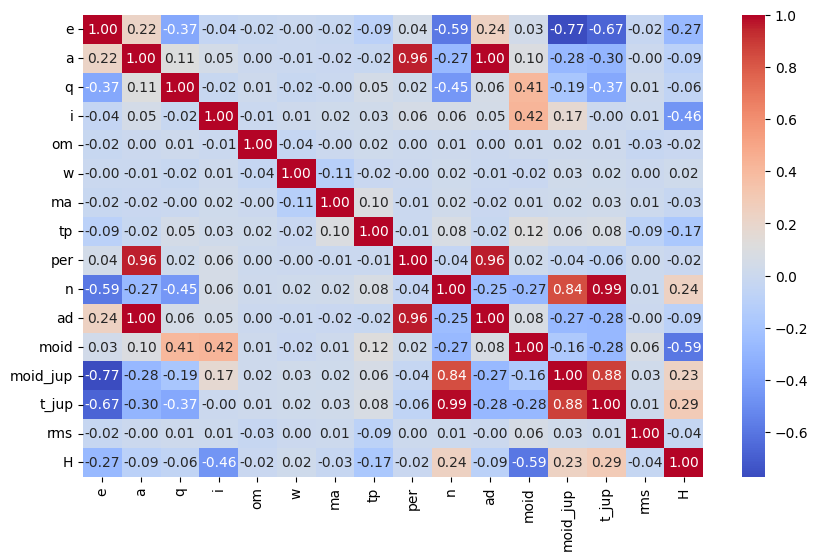

In [26]:
# Criando um mapa de calor da matriz de correlação

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")

plt.show()

Analisando as correlações entre nossas variáveis, podemos selecionar as mais adequadas para treinar nosso modelo. As variáveis com maior correlação e anti correlação possuem dependência linear com outras variáveis, então manter apenas uma delas é o suficiente e torna nosso modelo mais eficiente em termos de processamento computacional. As variáveis selecionadas foram:

*  e
*  a
*  q
*  i
*  om
*  w
*  ma
*  tp
*  n
*  moid
*  rms
*  H

In [27]:
# Selecionando as variáveis que utilizaremos no modelo
df_asteroids_selected = df_asteroids[['pha', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'tp', 'n', 'moid', 'rms', 'H']]
df_asteroids_selected.head(5)

,pha,e,a,q,i,om,w,ma,tp,n,moid,rms,H
0,1,0.520,1.290,0.618,2.03,280.0,288.0,38.4,2460143.715,0.676,0.00756,0.40,22.45
1,0,0.494,2.310,1.170,3.76,29.4,312.0,292.0,2460440.815,0.282,0.16700,0.60,17.73
2,0,0.477,1.790,0.935,3.80,283.0,134.0,345.0,2460237.085,0.413,0.01490,0.45,22.40
3,1,0.286,0.854,0.609,4.70,101.0,188.0,195.0,2460332.396,1.250,0.04600,0.42,21.63
4,1,0.210,0.828,0.654,8.54,274.0,327.0,325.0,2460227.355,1.310,0.01870,0.20,17.63


In [28]:
# Verificando as dimensões do dataframe
df_asteroids_selected.shape

(33217, 13)

In [29]:
# Verificando a quantidade de asteroides pha(1) e não pha(0)
df_asteroids_selected['pha'].value_counts()

0    30976
1     2241
Name: pha, dtype: int64

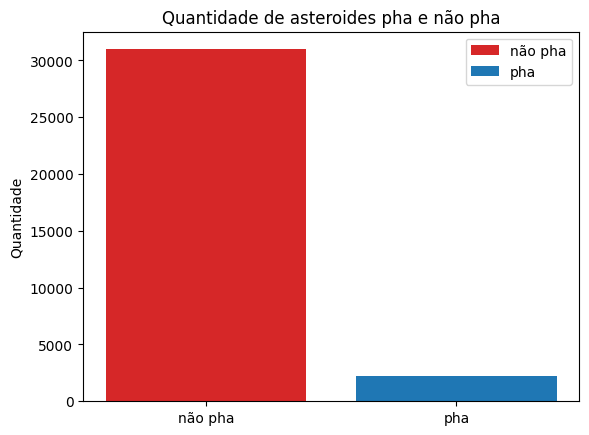

In [30]:
# Plotando quantidade x classe de asteroide
fig, ax = plt.subplots()

classes = ['não pha', 'pha']
counts = df_asteroids_selected['pha'].value_counts()
bar_labels = ['não pha', 'pha']
bar_colors = ['tab:red', 'tab:blue']

ax.bar(classes, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('Quantidade')
ax.set_title('Quantidade de asteroides pha e não pha')
ax.legend(title='')

plt.show()

Podemos notar que nossos dados não possuem uma distribuição de classes de asteroides balanceada. Tendo isto em vista, não usaremos grande parte dos dados para o treinamento, nos limitando a usar apenas o total de "pha's" mais um recorte de mesmo tamanho dos "não pha's" para balancearmos nossos dados de treino. Esta etapa será realizada mais a frente.

# Treinando o modelo

In [31]:
# Normalizando nossos dados

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_asteroids_selected.drop('pha', axis=1))

data_normalized = scaler.transform(df_asteroids_selected.drop('pha', axis=1))
X = pd.DataFrame(data_normalized, columns = df_asteroids_selected.columns[1:])

df_normalized = pd.concat([df_asteroids_selected['pha'], X], axis=1)

df_normalized

,pha,e,a,q,i,om,w,ma,tp,n,moid,rms,H
0,1,0.467320,-0.242726,-1.321240,-0.935560,1.043276,1.010052,-1.108400,0.404961,0.531458,-0.792351,-0.602731,-0.376862
1,0,0.320368,0.282472,1.131043,-0.773197,-1.373096,1.240361,0.969386,0.603757,-0.860147,0.822479,1.007981,-2.047809
2,0,0.224284,0.014724,0.087046,-0.769443,1.072203,-0.467765,1.403624,0.467437,-0.397456,-0.718011,-0.200053,-0.394563
3,1,-0.855249,-0.467222,-1.361223,-0.684977,-0.682704,0.050430,0.174649,0.531212,2.558820,-0.403026,-0.441660,-0.667154
4,1,-1.284801,-0.480609,-1.161309,-0.324589,0.985422,1.384304,1.239760,0.460926,2.770740,-0.679524,-2.213442,-2.083210
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33212,0,1.043825,0.442091,0.344713,-0.830447,0.609370,-0.016743,1.403624,0.487601,-1.036746,-0.834383,-0.924873,1.557471
33213,0,1.914233,1.507934,0.597938,1.248357,1.602532,-0.602112,1.510135,0.505491,-1.513918,1.592218,-2.132907,-1.680342
33214,0,0.744268,0.344260,0.597938,-0.908343,1.718240,-1.086721,1.510135,0.491092,-0.937850,-0.157925,0.041554,0.574020
33215,0,0.529492,-0.191236,-1.161309,-0.644621,0.638297,-0.874645,1.444589,0.454060,0.259494,-0.864605,-1.247015,1.899095


In [32]:
# Separando amostras de treino balanceando a quantidade de dados de cada classe
pha_asteroids = df_normalized[df_normalized['pha'] == 1][0:1900]
not_pha_asteroids = df_normalized[df_normalized['pha'] == 0][0:1900]

In [33]:
# Concatenando as duas classes de treino em um único dataframe
train_data = pd.concat([pha_asteroids, not_pha_asteroids], ignore_index=True)

In [34]:
# Separando a variáveis preditivas X e o label y
X_train = train_data[['e', 'a', 'q', 'i', 'om', 'w', 'ma', 'tp', 'n', 'moid', 'rms', 'H']]
y_train = train_data['pha']

In [35]:
# Separando dados de teste balanceado com as duas classes de asteroides em um único dataframe
test_data_pha = df_normalized[df_normalized['pha'] == 1][1901:2101]
test_data_no_pha = df_normalized[df_normalized['pha'] == 0][1901:2101]

test_data = pd.concat([test_data_pha, test_data_no_pha], ignore_index=True)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pha     400 non-null    int64  
 1   e       400 non-null    float64
 2   a       400 non-null    float64
 3   q       400 non-null    float64
 4   i       400 non-null    float64
 5   om      400 non-null    float64
 6   w       400 non-null    float64
 7   ma      400 non-null    float64
 8   tp      400 non-null    float64
 9   n       400 non-null    float64
 10  moid    400 non-null    float64
 11  rms     400 non-null    float64
 12  H       400 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 40.8 KB


In [36]:
# Separando a variáveis preditivas X e o label y
X_test = test_data[['e', 'a', 'q', 'i', 'om', 'w', 'ma', 'tp', 'n', 'moid', 'rms', 'H']]
y_test = test_data['pha']

In [57]:
# Criando o modelo Support Vector Classification (SVC)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

model = SVC(kernel='rbf')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Acurácia: {accuracy}')
print(f'Precisão: {precision}')
print(f'Recall: {recall}')

Acurácia: 0.93
Precisão: 0.8771929824561403
Recall: 1.0


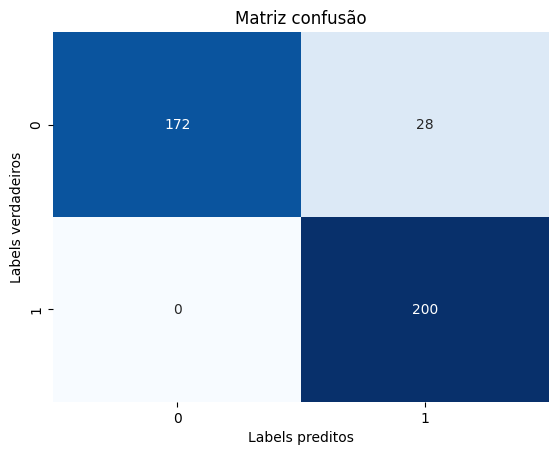

In [58]:
# Plotando matriz confusão
conf_matrix = confusion_matrix(y_test, y_pred)


sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Labels preditos')
plt.ylabel('Labels verdadeiros')
plt.title('Matriz confusão')
plt.show()

### Conclusão

Observando as métricas de acurácia, precisão, recall e a matriz de confusão, podemos afirmar que o modelo obteve um bom resultado, estando apto a fazer classificações com uma boa taxa de acertos.

Apesar do bom resultado, estas métricas ainda podem ser melhoradas com ajustes de hiperparâmetros e alimentando o modelo com uma maior quantidade de dados no treinamento, já que o modelo SVC se adequa melhor com uma base de treinamento maior.